In [1]:
import pandas as pd
import numpy as np 
import os
import sys

sys.path.append("..")
DATA_DIR = "~/Desktop/code/data/"

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 

## Taxonomy of training set

In [26]:
# Training output with clustering and classification
train_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'train-output.csv'))

# BacDive taxonomy information
bacdive_df = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "bacdive-all.csv"), low_memory=False)
bd_taxonomy = bacdive_df[["taxon_id", "domain", "phylum", "class", "order", "family", "genus", "species"]]

neighbors_list = train_df["taxon_id"].to_list()
neighbors = bd_taxonomy["taxon_id"].isin(neighbors_list)
bd_taxonomy = bd_taxonomy[neighbors]
bd_taxonomy = bd_taxonomy.drop_duplicates()

# Merge for neighbor_taxonomy information (multiple taxonomic classifications for some taxon_id's)
train_taxa = pd.merge(left=train_df, right=bd_taxonomy, on="taxon_id", how="left")
train_taxa = train_taxa.drop_duplicates()

#train_taxa.to_csv(os.path.join(DATA_DIR, "model", "train-taxa.csv"), index=False)
train_taxa.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     8.782784     5.898263     5.757063     5.833907     4.608732   
1     8.782784     5.898263     5.757063     5.833907     4.608732   
2     8.782784     5.898263     5.757063     5.833907     4.608732   
3     9.710889     6.151599     5.426264     5.512591     4.915431   
4     9.710889     6.151599     5.426264     5.512591     4.915431   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0     5.178930     5.552777     3.216833     6.436071      3.635296  ...   
1     5.178930     5.552777     3.216833     6.436071      3.635296  ...   
2     5.178930     5.552777     3.216833     6.436071      3.635296  ...   
3     4.459331     5.302310     4.438601     5.520104      6.693969  ...   
4     4.459331     5.302310     4.438601     5.520104      6.693969  ...   

   KMeans Cluster  taxon_id  Media Cluster    domain          phylum  \
0             132     100.0            9.0  Bacteria  Proteobacteria   
1             132     100.0            9.0  Bacteria  Actinobacteria   
2             132     100.0            9.0  Bacteria  Actinobacteria   
3             127     100.0            9.0  Bacteria  Proteobacteria   
4             127     100.0            9.0  Bacteria  Actinobacteria   

                 class            order            family             genus  \
0  Alphaproteobacteria  Caulobacterales  Caulobacteraceae  Phenylobacterium   
1       Actinobacteria  Actinomycetales  Mycobacteriaceae     Mycobacterium   
2       Actinobacteria  Actinomycetales  Mycobacteriaceae     Mycobacterium   
3  Alphaproteobacteria  Caulobacterales  Caulobacteraceae  Phenylobacterium   
4       Actinobacteria  Actinomycetales  Mycobacteriaceae     Mycobacterium   

                    species  
0  Phenylobacterium panacis  
1     Mycobacterium triplex  
2    Mycobacterium branderi  
3  Phenylobacterium panacis  
4     Mycobacterium triplex  

[5 rows x 42 columns]

In [31]:
print(len(train_df), "training samples,", len(train_taxa), "taxonomic classifications")
print("Important! Expands for multiple taxonomic-level classifications for a single taxon_id, use og frame for mapping")

8464 training samples, 25006 taxonomic classifications
Important! Expands for multiple taxonomic-level classifications for a single taxon_id, use og frame for mapping


## Taxonomy of KNearestNeighbors

In [3]:
# Model output with clustering and classification
model_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'ml-model-output.csv'))
model_df = model_df.rename(columns={"Media Cluster": "media_cluster", "taxon_id": "bin", "neighbor_taxon_id": "taxon_id"})

# BacDive taxonomy information
bacdive_df = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "bacdive-all.csv"), low_memory=False)
bd_taxonomy = bacdive_df[["taxon_id", "domain", "phylum", "class", "order", "family", "genus", "species"]]

neighbors_list = model_df["taxon_id"].to_list()
neighbors = bd_taxonomy["taxon_id"].isin(neighbors_list)
bd_taxonomy = bd_taxonomy[neighbors]
bd_taxonomy = bd_taxonomy.drop_duplicates()

# Merge for neighbor_taxonomy information (multiple taxonomic classifications for some taxon_id's)
model_neighbors = pd.merge(left=model_df, right=bd_taxonomy, on="taxon_id", how="left")

model_neighbors.to_csv(os.path.join(DATA_DIR, "model", "test-taxa.csv"), index=False)
model_neighbors.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     9.566709     5.879142     5.020658     5.346295     4.943074   
1     9.566709     5.879142     5.020658     5.346295     4.943074   
2     9.566709     5.879142     5.020658     5.346295     4.943074   
3     9.566709     5.879142     5.020658     5.346295     4.943074   
4     9.566709     5.879142     5.020658     5.346295     4.943074   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
1     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
2     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
3     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
4     4.068261     5.094788     5.370132     3.575392      4.875126  ...   

   neighbor_media_id  taxon_id  media_cluster    domain          phylum  \
0                J84   38402.0            9.0  Bacteria  Proteobacteria   
1                J84   38402.0            9.0  Bacteria  Proteobacteria   
2               J237   75385.0            NaN  Bacteria     Thermotogae   
3               J256    1901.0            9.0  Bacteria  Actinobacteria   
4               J256    1901.0            9.0  Bacteria  Proteobacteria   

                   class              order               family  \
0    Gammaproteobacteria     Pasteurellales      Pasteurellaceae   
1  Epsilonproteobacteria  Campylobacterales   Campylobacteraceae   
2            Thermotogae      Thermotogales       Thermotogaceae   
3         Actinobacteria    Actinomycetales  Thermomonosporaceae   
4    Gammaproteobacteria     Pasteurellales      Pasteurellaceae   

             genus                                species  
0  Aggregatibacter  Aggregatibacter actinomycetemcomitans  
1    Campylobacter                 Campylobacter gracilis  
2       Thermotoga                    Thermotoga maritima  
3    Spirillospora                   Spirillospora albida  
4  Aggregatibacter  Aggregatibacter actinomycetemcomitans  

[5 rows x 47 columns]

## Visualization

Complete model output:

In [149]:
train = pd.read_csv(os.path.join(DATA_DIR, "model", "train-output.csv"))
#train["Media Cluster"] = train["Media Cluster"].astype(str)
test = pd.read_csv(os.path.join(DATA_DIR, "model", "test-output.csv"))
print(len(train), "training points,", len(test), "test points")

# Plot the training points
fig = px.scatter(
    data_frame = train,
    x = "Component 30",
    y = "Component 26", # Change components to visualize each of the 30 dimensions
    color = "Media Cluster", 
    hover_data = ["taxon_id", "Target", "KMeans Cluster"], 
    opacity = 0.3
) 

# Add the test points as a scatter trace
fig.add_trace(
    go.Scatter(
        x=test["Component 30"],  # x coordinates
        y=test["Component 26"],  # y coordinates
        mode='markers',
        marker=dict(
            color="black",  
            size=5,  
            opacity=1.0 
        ),
        text=test["taxon_id"]  # marker hover text
    )
)

# Configure opacity slider
steps = []
for i in range(11):  # 0 to 1 in steps of 0.1
    step = dict(
        method="restyle",
        args=[{"marker.opacity": [i/20]}, [0]],  # Adjust opacity of the training points trace only (trace index [0])
        label=str(i/20)
    )
    steps.append(step)

sliders = [dict(
    active=1,  # Initial value corresponding to opacity=0.1 (i.e., 1st step)
    currentvalue={"prefix": "Opacity: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="30 Dimensions, Training & Test Model Outputs",
    template="plotly_white",
)

fig.show()

8464 training points, 247 test points


Model output subsets:

In [151]:
train = pd.read_csv(os.path.join(DATA_DIR, "model", "train-taxa.csv"))
test = pd.read_csv(os.path.join(DATA_DIR, "model", "output-metadata.csv"))
print(len(train), "training points,", len(test), "test points")

25006 training points, 1350 test points


In [153]:
# TRAINING SET ONLY

fig = px.scatter(
    data_frame = train,
    x = "Component 30",
    y = "Component 26", # Change components to visualize each of the 30 dimensions
    color = "class",
    hover_data = ["taxon_id", "Target", "KMeans Cluster"],
    opacity = 0.1,
    title = "Class-Level Taxonomy, Training Set"
) 

steps = []
for i in range(11):  # 0 to 1 in steps of 0.1
    step = dict(
        method="restyle", args=[{"marker.opacity": [i/20]}, [0]], label=str(i/20))
    steps.append(step)
sliders = [dict(active=1, currentvalue={"prefix": "Opacity: "}, pad={"t": 50}, steps=steps)]

fig.update_layout(
    sliders=sliders,
    template="plotly_white",
)

fig.show()

In [154]:
# Weird formatting stuff for metadata
train = pd.read_csv(os.path.join(DATA_DIR, "model", "train-taxa.csv"))
test = pd.read_csv(os.path.join(DATA_DIR, "model", "output-metadata.csv"))
print(len(train), "training points,", len(test), "test points")

test["temp"] = test["temp"].astype(str)
test["ph"] = test["ph"].astype(str)

temp = test.copy()
temp["temp"] = temp["temp"].dropna()
temp_nan = temp["temp"].str.contains("nan")
temp = temp[~temp_nan]
temp["temp"] = temp["temp"].astype("f8")
print(len(temp), "points with temperature data")

ph = test.copy()
ph["ph"] = ph["ph"].dropna()
ph_nan = ph["ph"].str.contains("nan")
ph = ph[~ph_nan]
ph["ph"] = ph["ph"].astype("f8")
print(len(ph), "points with pH data")

25006 training points, 1350 test points
1180 points with temperature data
1180 points with pH data


In [156]:
# TEST SET ONLY

fig1 = px.scatter(
    data_frame = test,
    x = "Component 30",
    y = "Component 26", # Change components to visualize each of the 30 dimensions
    color = "SiteID",
    hover_data = ["bin", "RF Classify"],
    opacity = 0.5,
    title = "SiteID, Test Set",
    template="plotly_white"
) 

fig2 = px.scatter(
    data_frame = temp,
    x = "Component 30",
    y = "Component 26", # Change components to visualize each of the 30 dimensions
    color = "temp",
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "RF Classify"],
    opacity = 0.5,
    title = "Temperature, Test Set",
    template="plotly_white"
) 

fig3 = px.scatter(
    data_frame = ph,
    x = "Component 30",
    y = "Component 26", # Change components to visualize each of the 30 dimensions
    color = "ph",
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "RF Classify"],
    opacity = 0.5,
    title = "pH, Test Set",
    template="plotly_white"
) 

fig1.show()
fig2.show()
fig3.show()

#TODO: sum or map across different major ions and trace elements

In [91]:
#TODO: make individual dataframes with .dropna() of each of these features to omit points with no data?

## EC comparison

In [8]:
ml_input = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

bins = ml_input["source"].str.contains("KBase")
db = ml_input[~bins]
mag = ml_input[bins]

db_ec = db["ec"].to_list()
mag_ec = mag["ec"].to_list()

ec_mask = mag["ec"].isin(db_ec)
overlap = mag[ec_mask]
unique = mag[~ec_mask]

overlap_list = overlap["ec"].to_list()
ovset = set(overlap_list)

unique_list = unique["ec"].to_list()
unset = set(unique_list)

print(len(ovset), "overlapping EC's", len(unset), "unique")

1518 overlapping EC's 305 unique


3875 training ECs, 1823 test ECs


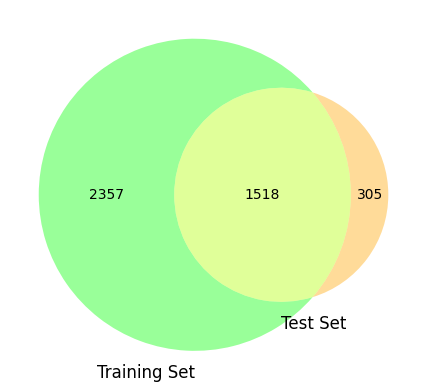

In [157]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

venn2(
    subsets=[
        set(db_ec),
        set(mag_ec)
    ],
    set_labels=[
        "Training Set",
        "Test Set"
    ],
    set_colors=[
        "lime",
        "orange"
    ]
)

print(len(set(db_ec)), "training ECs,", len(set(mag_ec)), "test ECs")

In [10]:
tec = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df = tec.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df['Group'] = enzyme_df['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']
# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class

taxa_enzyme_counts = grouped_df[['Group','Class','Total Count']]
print(taxa_enzyme_counts)

# Plot the occurrence of enzymes across all of our selected taxa 
#fig = px.bar(taxa_enzyme_counts, x="Class", y="Total Count")
#fig.show()


  Group            Class  Total Count
0     1  Oxidoreductases       250577
1     2     Transferases       512583
2     3       Hydrolases       462458
3     4           Lyases       146148
4     5       Isomerases        99566
5     6          Ligases       141588
6     7     Translocases        48603


In [11]:
bec = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = bec["source"].str.contains("KBase")
bec = bec[bins]

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df2 = bec.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df2['Group'] = enzyme_df2['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df2 = enzyme_df2.groupby('Group')['count'].sum().reset_index()
grouped_df2.columns = ['Group','Total Count']
# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df2['Class'] = ec_class

bin_enzyme_counts = grouped_df2[['Group','Class','Total Count']]
print(bin_enzyme_counts)

# Plot the occurrence of enzymes across all of our selected taxa 
#fig = px.bar(bin_enzyme_counts, x="Class", y="Total Count")
#fig.show()

  Group            Class  Total Count
0     1  Oxidoreductases        19797
1     2     Transferases        43665
2     3       Hydrolases        18635
3     4           Lyases        11449
4     5       Isomerases         7521
5     6          Ligases         9864
6     7     Translocases         6191


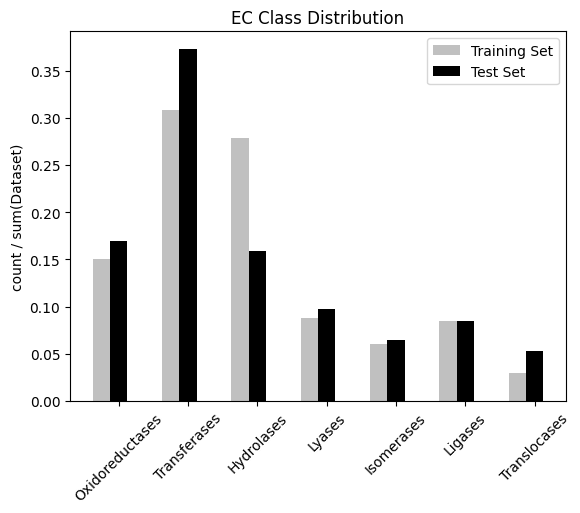

In [12]:
# Normalize counts
df1 = taxa_enzyme_counts.copy() 
sum1 = df1['Total Count'].sum(axis=0)
df1['Training_Proportion'] = df1['Total Count'].div(sum1)

df2 = bin_enzyme_counts.copy() 
sum2 = df2['Total Count'].sum(axis=0)
df2['Test_Proportion'] = df2['Total Count'].div(sum2)

N = 7
ind = np.arange(N)  
width = 0.25
  
xvals = df1['Training_Proportion']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = df2['Test_Proportion']
bar2 = plt.bar(ind+width, yvals, width, color='black') 
  
plt.xticks(ind+width,['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases'],rotation=45) 
plt.ylabel("count / sum(Dataset)") 
plt.title("EC Class Distribution") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set', 'Overlap')) 

plt.show() 

## Cofactor comparison

In [13]:
ml_input = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = ml_input["source"].str.contains("KBase")
bin_ec = ml_input[bins]

ec_list = bin_ec["ec"].to_list()
ec_list = set(ec_list)

print(len(ec_list), "unique bin ECs")

1823 unique bin ECs


In [14]:
# Retrieving bin cofactors
#import modules.cofactors as cofactors
#bin_cofactors = cofactors.ec2metals(ec_list)

#bin_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "bins-cofactors-raw.csv"), index=False)
#bin_cofactors.head()

In [15]:
# Format ec2metals output
bin_cofactors = pd.read_csv((os.path.join(DATA_DIR, "cofactors", "bins-cofactors-raw.csv")))
cofactors = bin_cofactors.drop_duplicates().copy()
cofactors = cofactors.dropna(subset=['CofactorExtracted']).copy()

# List out all cofactors
CofactorFinal = cofactors.drop_duplicates(subset=['Query EC','CofactorFinal']).copy()
CofactorFinal.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), index=False) #SAVE

# Group cofactors by EC
grouped_cofactors = CofactorFinal.groupby("Query EC", as_index=False)["CofactorFinal"].apply(lambda x: "[%s]" % ', '.join(x))
grouped_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins-grouped.csv"), index=False) #SAVE

grouped_cofactors.head()

Query EC CofactorFinal
0    1.1.1.1      [Zn, Fe]
1  1.1.1.103          [Zn]
2  1.1.1.105          [Zn]
3  1.1.1.133          [Mg]
4   1.1.1.17          [Zn]

In [16]:
print(len(CofactorFinal), "ECs with cofactors, approximately", len(grouped_cofactors), "of which are cambialistic")

1226 ECs with cofactors, approximately 707 of which are cambialistic


In [17]:
co = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), low_memory=False)

import plotly.express as px

fig = px.bar(
    data_frame = co.value_counts("CofactorFinal").reset_index(),
    x="CofactorFinal",
    y="count",
    title="FENIX21 cofactors"
    #color="Class"
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.show()

In [18]:
cg = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins-grouped.csv"), low_memory=False)

import plotly.express as px

fig = px.bar(
    data_frame = cg.value_counts("CofactorFinal").reset_index(),
    x="CofactorFinal",
    y="count",
    title="FENIX21 cofactors (grouped by EC)"
    #color="Class"
)
fig.update_xaxes(title='', visible=True, showticklabels=True)
fig.show()

In [19]:
# Load dataframes
co = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), low_memory=False)
ct = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-taxa.csv"), low_memory=False)

#Create, merge, format counts 
coct = co["CofactorFinal"].value_counts().reset_index()
sum1 = coct["count"].sum(axis=0)
coct['ratio1'] = coct['count'].div(sum1)
coct = coct.rename(columns={"count": "count1"})

ctct = ct["CofactorFinal"].value_counts().reset_index()
sum2 = ctct["count"].sum(axis=0)
ctct['ratio2'] = ctct['count'].div(sum2)
ctct = ctct.rename(columns={"count": "count2"})

cf_df = pd.merge(left=coct, right=ctct, on="CofactorFinal", how="left")
cf_df = cf_df.fillna(0)
cf_df.head()

CofactorFinal  count1    ratio1  count2    ratio2
0            Mg     305  0.248777     671  0.195228
1            Fe     214  0.174551     602  0.175153
2            Zn     157  0.128059     425  0.123654
3             S     127  0.103589     322  0.093686
4            Mn      93  0.075856     252  0.073320

In [20]:
x = cf_df["count1"].sum(axis=0)
y = cf_df["count2"].sum(axis=0)
print(x, "annotated bin cofactors", y, "annotated db cofactors")

1226 annotated bin cofactors 3406 annotated db cofactors


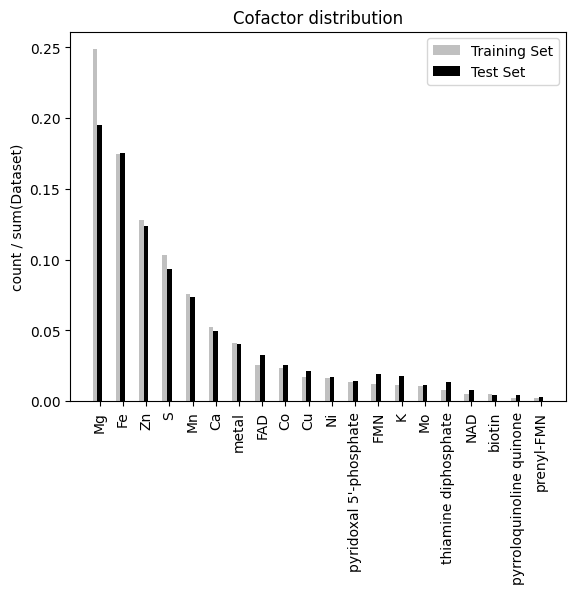

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 

data = cf_df.head(20) # Subset full dataframe; usual length is ~45 cofactors
N = 20
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"], rotation=90) 
plt.ylabel("count / sum(Dataset)") 
plt.title("Cofactor distribution") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set'))

plt.show() 

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (13,) and arg 1 with shape (20,).

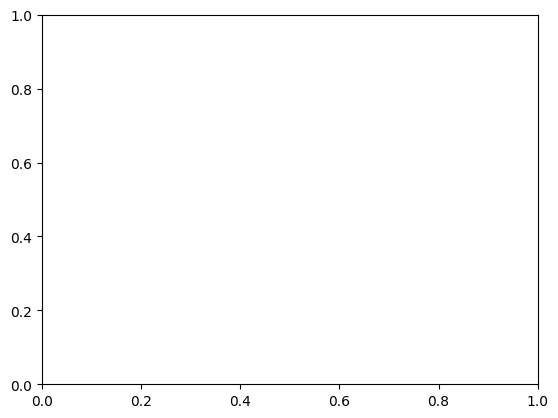

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 

data = cf_df.iloc[7:7+N]
N = 13
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"], rotation=90) 
plt.ylabel("count / sum(Dataset)") 
plt.title("Cofactor distribution (tail)") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set'))

plt.show() 

In [ ]:
cf = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), low_memory=False)
cf = cf[["Query EC", "CofactorFinal"]]
cf = cf.rename(columns={"Query EC": "ec", "CofactorFinal": "cofactor"})

taxa = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = taxa["source"].str.contains("KBase")
taxa = taxa[bins]

binco = pd.merge(left=taxa, right=cf, on="ec", how="left")
binco = binco[["taxon_id", "ec", "cofactor"]]
binco = binco.rename(columns={"taxon_id": "bin_name"})

binco.to_csv(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv"), index=False)
binco.head()

bin_name         ec cofactor
0  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  2.1.1.297      NaN
1  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   6.1.1.21      NaN
2  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33      NH4
3  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33       Mn
4  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33        K

In [ ]:
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))

data = data.dropna()
data_heatmap = data[["bin_name", "cofactor"]].drop_duplicates()
data_heatmap["count"] = 1

data_heatmap = data_heatmap.pivot(index="bin_name", columns="cofactor", values="count") #.pivot

import plotly.express as px
px.imshow(data_heatmap, width=1000, height=1000)

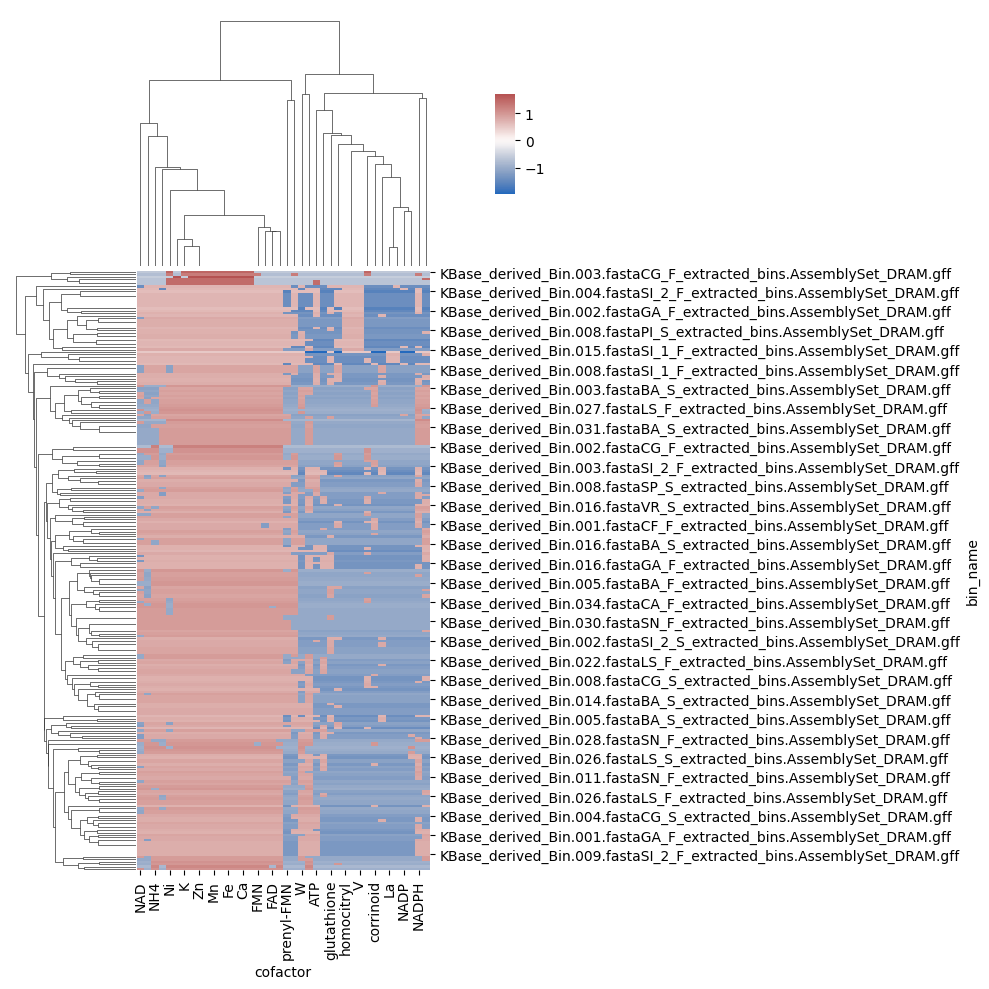

In [ ]:
import seaborn as sns

data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))

data = data[["bin_name", "cofactor"]].drop_duplicates()
data["count"] = 1
data = pd.pivot_table(data, values='count', index='bin_name', columns='cofactor')
data = data.fillna(0)

sns.clustermap(data, z_score=0, cmap="vlag", center=0, dendrogram_ratio=0.3, cbar_pos=(0.5, 0.8, 0.02, 0.10))

#cm = sns.clustermap(data)
#cm.cax.set_visible(False) # remove color bar for binary data

In [ ]:
# Most impactful features for model outputs
m4f = ["4.1.1.17", "1.9.3.1", "3.5.1.5", "3.2.1.20", "1.1.1.1", "3.2.1.22", "2.1.2.1", "3.5.3.6", "3.2.1.21"]
print(len(m4f), "important model features (04-Model-Eval)")

# Retrieving bin cofactors
import modules.cofactors as cofactors
m4f_cofactors = cofactors.ec2metals(m4f)

# Format
cofactors = m4f_cofactors.drop_duplicates().copy()
cofactors = cofactors.dropna(subset=['CofactorExtracted']).copy()

CofactorFinal = cofactors.drop_duplicates(subset=['Query EC','CofactorFinal']).copy()
CofactorFinal.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-feature_importance.csv"), index=False) #SAVE

grouped_cofactors = CofactorFinal.groupby("Query EC", as_index=False)["CofactorFinal"].apply(lambda x: "[%s]" % ', '.join(x))
grouped_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-feature_importance-grouped.csv"), index=False) #SAVE

grouped_cofactors.head()

9 important model features (04-Model-Eval)


100%|██████████| 9/9 [00:07<00:00,  1.13it/s]


Query EC      CofactorFinal
0   1.1.1.1           [Zn, Fe]
1  3.2.1.20          [NAD, Mn]
2  3.2.1.22  [Mg, Ca, Mn, NAD]
3   3.5.1.5               [Ni]

In [ ]:
#TODO: assign +/- impact to feature importance cofactors
#TODO: evaluate feature importance of 05-Model-Test and visualize those components

## Bin metadata

In [82]:
model_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'ml-model-output.csv'))
model_df = model_df.rename(columns={"Media Cluster": "media_cluster", "taxon_id": "bin", "neighbor_taxon_id": "taxon_id"})

f_env = pd.read_csv(os.path.join(DATA_DIR, 'MAGs', 'FENIX21', 'envdata.csv'))
f_env = f_env.astype(str)
env_subset = f_env[["SiteID", "site_name", "waterType", "temp", "ph", "spc","sal", "alk_tot"]]
env_subset

SiteID                 site_name waterType   temp    ph    spc     sal  \
0      AS  Acqua sauna lido scoglio       nan   65.0  5.96    nan    36.0   
1      BA                   Bagnone       nan   64.0   7.0    nan     nan   
2      CA             Acqua Cantani   Ca-HCO3  17.48  6.34  2.757    0.14   
3      CF    Terme Caracciolo Forte   Ca-HCO3   53.0  5.36  3.067   0.156   
4      CG            Capasso geyser     Na-Cl   47.2  6.51   9.78   0.528   
5      CP        Capasso parcheggio       nan   46.9   nan  9.932     nan   
6      FE          Sorgente Ferrata   Ca-HCO3  15.22  6.49  1.946     0.1   
7      GA         Grotta dell'acqua     Na-Cl   32.6  6.41    nan    10.0   
8      LS           Lido lo scoglio     Na-Cl   47.8  6.12    nan    21.0   
9      ML       Madonna dei Lattani   Ca-HCO3   15.0   8.6   0.22   0.011   
10     PI           Piccolo Inferno    Ca-SO4   29.5  2.13   3.27   0.169   
11    SI1     Hotel Sinuessa anfora     Na-Cl   34.0  5.98  6.555   7.732   
12    SI2       Hotel Sinuess pozzo     Na-Cl   44.0  6.27    7.8   9.342   
13     SN           Stufe di Nerone     Na-Cl   63.0   6.1    nan    21.0   
14     SP         Sorgente Petrinum       nan   35.0   6.1  5.888    6.88   
15     SP         Sorgente Petrinum   Ca-HCO3   32.5   6.2    0.7   0.055   
16     SS      Hotel Sinuess strada       nan   50.3  6.04  8.575  10.356   
17     VR                  Varchera    Ca-SO4   14.0  5.98    nan     5.0   

   alk_tot  
0      nan  
1      nan  
2   1200.0  
3   1400.0  
4   1400.0  
5      nan  
6    800.0  
7    800.0  
8    600.0  
9    200.0  
10     0.0  
11  1000.0  
12  1400.0  
13   400.0  
14     nan  
15  2000.0  
16     nan  
17  1000.0

In [84]:
# Merging our metadata with the model output
df1 = model_df
df2 = env_subset

# Using regex to capture the two-letter identifier
df1['SiteID'] = df1['bin'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')

# Clean up identifiers to ensure they match
df1.loc[:, 'SiteID'] = df1['SiteID'].str.strip().str.upper()
df2.loc[:, 'SiteID'] = df2['SiteID'].str.strip().str.upper()

# Merge our dataframes
benv = pd.merge(left=df1, right=df2, on="SiteID", how="left")

benv.to_csv(os.path.join(DATA_DIR, "model", "output-metadata.csv"), index=False)
benv.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     9.566709     5.879142     5.020658     5.346295     4.943074   
1     9.566709     5.879142     5.020658     5.346295     4.943074   
2     9.566709     5.879142     5.020658     5.346295     4.943074   
3     9.566709     5.879142     5.020658     5.346295     4.943074   
4     9.566709     5.879142     5.020658     5.346295     4.943074   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
1     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
2     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
3     4.068261     5.094788     5.370132     3.575392      4.875126  ...   
4     4.068261     5.094788     5.370132     3.575392      4.875126  ...   

   taxon_id  media_cluster  SiteID  site_name  waterType  temp   ph  spc  sal  \
0   38402.0            9.0      BA    Bagnone        nan  64.0  7.0  nan  nan   
1   75385.0            NaN      BA    Bagnone        nan  64.0  7.0  nan  nan   
2    1901.0            9.0      BA    Bagnone        nan  64.0  7.0  nan  nan   
3   33034.0            9.0      BA    Bagnone        nan  64.0  7.0  nan  nan   
4   33034.0            9.0      BA    Bagnone        nan  64.0  7.0  nan  nan   

   alk_tot  
0      nan  
1      nan  
2      nan  
3      nan  
4      nan  

[5 rows x 48 columns]

In [ ]:
#Metals
fm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "fluid_metals.csv"))
sm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "sediment_metals.csv"))
fm.head()

ExpID SiteID      v        mn       fe     co     ni        cu  \
0  FENIX21     AS  2.618  2818.323  428.952  0.174  6.970  2.056500   
1  FENIX21     BA    NaN       NaN      NaN    NaN    NaN       NaN   
2  FENIX21     CA  2.564    12.856   57.942  0.019  1.652  0.229667   
3  FENIX21     CF  0.363    13.245   17.375  0.014  6.085  0.161667   
4  FENIX21     CG  0.098     4.391    3.424  0.017  1.653  5.164333   

          zn        se  ...        zr     nb  ag     cd          cs  \
0  20.350667  0.599667  ...  0.221000    NaN NaN  0.039   84.515333   
1        NaN       NaN  ...       NaN    NaN NaN    NaN         NaN   
2   2.097000  0.029000  ...       NaN    NaN NaN    NaN   19.443500   
3   5.288000       NaN  ...  0.437667  0.001 NaN    NaN  224.728667   
4   3.086333  0.132667  ...  0.095667    NaN NaN    NaN  295.951315   

           ba  ta        tl        pb         u  
0   40.805333 NaN  4.483167  0.024667  1.834833  
1         NaN NaN       NaN       NaN       NaN  
2   27.804667 NaN       NaN       NaN  0.821667  
3   68.814333 NaN       NaN       NaN       NaN  
4  111.527000 NaN       NaN       NaN       NaN  

[5 rows x 31 columns]

In [ ]:
#TODO: Compare environmental metals against bin cofactor abundance

In [ ]:
df = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
df

bin_name         ec cofactor
0       KBase_derived_Bin.001.fastaBA_F_extracted_bins...  2.1.1.297      NaN
1       KBase_derived_Bin.001.fastaBA_F_extracted_bins...   6.1.1.21      NaN
2       KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33      NH4
3       KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33       Mn
4       KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33        K
...                                                   ...        ...      ...
182816  KBase_derived_Bin.039.fastaLS_S_extracted_bins...  2.7.1.107       Mg
182817  KBase_derived_Bin.039.fastaLS_S_extracted_bins...    1.7.2.5      NaN
182818  KBase_derived_Bin.039.fastaLS_S_extracted_bins...   3.2.1.81      NaN
182819  KBase_derived_Bin.039.fastaLS_S_extracted_bins...   3.1.21.7       Mg
182820  KBase_derived_Bin.039.fastaLS_S_extracted_bins...   3.5.4.33       Zn

[182821 rows x 3 columns]

In [ ]:
from upsetplot import generate_counts
example = generate_counts()
example

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

In [ ]:
#TODO: UPSET PLOTS FOR ENV

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from upsetplot import UpSet

# Load the dataset into a DataFrame
data_df = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))

# Get five features most correlated with median house value
#correls = data_df.corrwith(
#    pd.Series(diabetes.target), method="spearman"
#).sort_values()
#top_features = correls.index[-5:]

# Get a binary indicator of whether each top feature is above average
diabetes_above_avg = data_df > data_df.median(axis=0)
diabetes_above_avg = diabetes_above_avg[top_features]
diabetes_above_avg = diabetes_above_avg.rename(columns=lambda x: x + ">")

# Make this indicator mask an index of data_df
data_df = pd.concat([data_df, diabetes_above_avg], axis=1)
data_df = data_df.set_index(list(diabetes_above_avg.columns))

# Also give us access to the target (median house value)
data_df = data_df.assign(progression=diabetes.target)